In [107]:
import getpass
import numpy as np
import pandas as pd
import requests as rq
from io import StringIO
import json
import seaborn as sns
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import six

In [2]:
#DHIS2 username and password variables
dhis_uname="danielmapemba"
dhis_pwd=""

In [3]:
dhis_url="https://ohsp.health.gov.mw/api/29/analytics.csv?dimension=dx:zCaomudM2hO;HVgXXXkNM18;lDDNIwULlwv;F4EVkALCrm1;XX87aQO48lt;cJ9jP3kr3DD;IscKKNJXRR6;we4K5ImBBNN;laofi1xaiKS&dimension=pe:THIS_YEAR&dimension=ou:USER_ORGUNIT_GRANDCHILDREN&displayProperty=NAME&tableLayout=true&columns=dx&rows=pe;ou&user=pQBPfvH61zP"
#If you need to protect your password, you can use getpass
response=rq.get(dhis_url, auth=(dhis_uname,getpass.getpass()))
#response=rq.get(dhis_url, auth=(dhis_uname,dhis_pwd))

In [4]:
dhis_url_timeline="https://ohsp.health.gov.mw/api/29/analytics/events/aggregate/uYjxkTbwRNf.csv?dimension=ou:lZsCb6y0KDX&dimension=dDHkBd3X8Ce.ovY6E8BSdto:IN:Positive&dimension=pe:20200101;20200102;20200103;20200104;20200105;20200106;20200107;20200108;20200109;20200110;20200111;20200112;20200113;20200114;20200115;20200116;20200117;20200118;20200119;20200120;20200121;20200122;20200123;20200124;20200125;20200126;20200127;20200128;20200129;20200130;20200131;20200201;20200202;20200203;20200204;20200205;20200206;20200207;20200208;20200209;20200210;20200211;20200212;20200213;20200214;20200215;20200216;20200217;20200218;20200219;20200220;20200221;20200222;20200223;20200224;20200225;20200226;20200227;20200228;20200229;20200301;20200302;20200303;20200304;20200305;20200306;20200307;20200308;20200309;20200310;20200311;20200312;20200313;20200314;20200315;20200316;20200317;20200318;20200319;20200320;20200321;20200322;20200323;20200324;20200325;20200326;20200327;20200328;20200329;20200330;20200331;20200401;20200402;20200403;20200404;20200405;20200406;20200407;20200408;20200409;20200410;20200411;20200412;20200413;20200414;20200415;20200416;20200417;20200418;20200419;20200420;20200421;20200422;20200423;20200424;20200425;20200426;20200427;20200428;20200429;20200430;20200501;20200502;20200503;20200504;20200505;20200506;20200507;20200508;20200509;20200510;20200511;20200512;20200513;20200514;20200515;20200516;20200517;20200518;20200519;20200520;20200521;20200522;20200523;20200524;20200525;20200526;20200527;20200528;20200529;20200530;20200531;20200601;20200602;20200603;20200604;20200605;20200606;20200607;20200608;20200609;20200610;20200611;20200612;20200613;20200614;20200615;20200616;20200617;20200618;20200619;20200620;20200621;20200622;20200623;20200624;20200625;20200626;20200627;20200628;20200629;20200630;20200701;20200702;20200703;20200704;20200705;20200706;20200707;20200708;20200709;20200710;20200711;20200712;20200713;20200714;20200715;20200716;20200717;20200718;20200719;20200720;20200721;20200722;20200723;20200724;20200725;20200726;20200727;20200728;20200729;20200730;20200731;20200801;20200802;20200803;20200804;20200805;20200806;20200807;20200808;20200809;20200810;20200811;20200812;20200813;20200814;20200815;20200816;20200817;20200818;20200819;20200820;20200821;20200822;20200823;20200824;20200825;20200826;20200827;20200828;20200829;20200830;20200831;20200901;20200902;20200903;20200904;20200905;20200906;20200907;20200908;20200909;20200910;20200911;20200912;20200913;20200914;20200915;20200916;20200917;20200918;20200919;20200920;20200921;20200922;20200923;20200924;20200925;20200926;20200927;20200928;20200929;20200930;20201001;20201002;20201003;20201004;20201005;20201006;20201007;20201008;20201009;20201010;20201011;20201012;20201013;20201014;20201015;20201016;20201017;20201018;20201019;20201020;20201021;20201022;20201023;20201024;20201025;20201026;20201027;20201028;20201029;20201030;20201031;20201101;20201102;20201103;20201104;20201105;20201106;20201107;20201108;20201109;20201110;20201111;20201112;20201113;20201114;20201115;20201116;20201117;20201118;20201119;20201120;20201121;20201122;20201123;20201124;20201125;20201126;20201127;20201128;20201129;20201130;20201201;20201202;20201203;20201204;20201205;20201206;20201207;20201208;20201209;20201210;20201211;20201212;20201213;20201214;20201215;20201216;20201217;20201218;20201219;20201220;20201221;20201222;20201223;20201224;20201225;20201226;20201227;20201228;20201229;20201230;20201231&stage=dDHkBd3X8Ce&displayProperty=NAME&tableLayout=true&columns=ou&rows=ovY6E8BSdto;pe"
#If you need to protect your password, you can use getpass
response2=rq.get(dhis_url_timeline, auth=(dhis_uname,getpass.getpass()))
#response2=rq.get(dhis_url_timeline, auth=(dhis_uname,dhis_pwd))

In [138]:
#Read the data to a pandas dataset for individual data
dset2=pd.DataFrame(pd.read_csv(StringIO(response.text)))
dset2_timeline = pd.DataFrame(pd.read_csv(StringIO(response2.text)))

In [139]:
dset2.drop(['periodid','periodcode','periodcode', 'periodname', 'perioddescription', 'organisationunitid', 'organisationunitcode', 'organisationunitdescription'], axis=1, inplace=True)
#dset2_timeline.drop(['periodid','periodcode','periodcode', 'periodname', 'perioddescription', 'organisationunitid', 'organisationunitcode', 'organisationunitdescription'], axis=1, inplace=True)

In [165]:
dset2_timeline.fillna(0)
newdata = dset2.drop([dset2.index[5], dset2.index[6], dset2.index[7], dset2.index[8], dset2.index[9]])
newdata = newdata.round(0)

In [166]:
newdata['organisationunitname'] = newdata['organisationunitname'].map(lambda x: x.rstrip('-DHO'))
newdata.columns = ['District', 'OHSP-Suspected Cases', 'OHSP-lab tests', 'OHSP-lab2', 'OHSP-Positives', 'OHSP-Confirmed', 'OHSP-Deaths', 'OHSP-Recovered', 'OHSP-Local Transmission', 'OHSP-Imported']

In [167]:
newdata.head(10)

,District,OHSP-Suspected Cases,OHSP-lab tests,OHSP-lab2,OHSP-Positives,OHSP-Confirmed,OHSP-Deaths,OHSP-Recovered,OHSP-Local Transmission,OHSP-Imported
0,Dowa,1.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,1.0
1,Kasungu,17.0,132.0,12.0,22.0,26.0,1.0,NaN,2.0,NaN
2,Nkhotakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ntchisi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Salima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Dedza,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
11,Lilongwe,9.0,164.0,9.0,163.0,164.0,NaN,2.0,NaN,NaN
12,Mchinji,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Ntcheu,15.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0
14,Chitipa,95.0,155.0,92.0,37.0,38.0,NaN,1.0,1.0,1.0


In [10]:
#change dset2_timeline (period) to date object
dset2_timeline['period'] = pd.to_datetime(dset2_timeline['period'])
dset2_timeline['MOH MALAWI Govt'] = pd.to_numeric(dset2_timeline['MOH MALAWI Govt'])
#dset2_timeline = dset2_timeline.groupby([dset2_timeline['period'].dt.date]).sum()

In [11]:
dset2_timeline.head()

,ovY6E8BSdto,period,MOH MALAWI Govt
0,Positive,2020-03-03,1
1,Positive,2020-04-06,1
2,Positive,2020-04-07,2
3,Positive,2020-04-08,2
4,Positive,2020-04-10,2


In [12]:
#Get data from Googlesheets

In [74]:
scope = ["https://spreadsheets.google.com/feeds", 'https://www.googleapis.com/auth/spreadsheets',
         "https://www.googleapis.com/auth/drive.file", "https://www.googleapis.com/auth/drive"]

In [75]:
credentials = ServiceAccountCredentials.from_json_keyfile_name('Python to covid data-46ed92789e4b.json', scope)

In [76]:
client = gspread.authorize(credentials)

In [77]:
spreadsheet = client.open('EPI_CURVE_Malawi Monitoring Cases_20200209')

In [79]:
hash = spreadsheet.worksheet('Confirmed')
hash2 = spreadsheet.worksheet('Confimed Aggregates')

In [92]:
data = pd.DataFrame(hash.get_all_records())
data2 = pd.DataFrame(hash2.get_all_records())

In [93]:
data = data[['Date', 'Confirmed']]
data2 = data2[['District', 'Confirmed', 'Deaths', 'Recovered']]
data2.columns = ['District', 'PHIM_Confirmed', 'PHIM_Deaths', 'PHIM_Recovered']

In [20]:
#change date column to date object & confirmed column to int
data['Date'] = pd.to_datetime(data['Date'])
data['Confirmed'] = pd.to_numeric(data['Confirmed'])
#group data by date
#data = data.groupby([data['Date']]).sum()

In [21]:
data.head(10)

,Date,Confirmed
0,2020-04-02,3.0
1,2020-04-04,1.0
2,2020-04-06,1.0
3,2020-04-07,2.0
4,2020-04-07,1.0
5,2020-04-10,1.0
6,2020-04-11,2.0
7,2020-04-11,1.0
8,2020-04-12,1.0
9,2020-04-13,3.0


In [22]:
mergeddata = pd.merge(data, dset2_timeline, left_on='Date', right_on='period')
mergeddata = mergeddata[['period', 'MOH MALAWI Govt', 'Confirmed']]
mergeddata.columns = ['Date', 'OHSP Confirmed', 'PHIM Confirmed']

In [23]:
mergeddata.head(20)

,Date,OHSP Confirmed,PHIM Confirmed
0,2020-04-06,1,1.0
1,2020-04-07,2,2.0
2,2020-04-07,2,1.0
3,2020-04-10,2,1.0
4,2020-04-13,1,3.0
5,2020-04-18,1,0.0
6,2020-04-30,1,1.0
7,2020-05-01,1,0.0
8,2020-05-01,1,0.0
9,2020-05-02,1,1.0


In [24]:
#PREPARATION FOR CHARTS
plt.figure(figsize=(30, 10))

<Figure size 2160x720 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


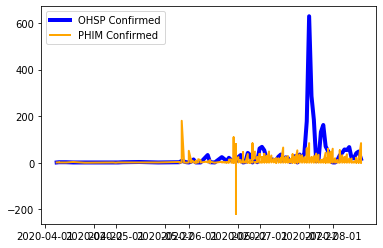

In [25]:
plt.plot( 'Date', 'OHSP Confirmed', data=mergeddata, markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.plot( 'Date', 'PHIM Confirmed', data=mergeddata,  color='orange', linewidth=2)
plt.legend()

In [26]:
#Download data
#Download indicator data
newdata.to_csv('indicatorsohsp.csv', index = False)
#Download crosstab data
mergeddata.to_csv('timelineOHSPPHIM.csv', index = False)

In [156]:
#OUTPUT 1: TABLE WITH INDICATOR DATA
newdata = newdata[['District','OHSP-Confirmed', 'OHSP-Deaths', 'OHSP-Recovered']]
district_comparison = pd.merge(newdata, data2, left_on='District', right_on='District')
district_comparison = district_comparison[['District','OHSP-Confirmed', 'PHIM_Confirmed', 'OHSP-Deaths', 'PHIM_Deaths', 'OHSP-Recovered', 'PHIM_Recovered']]
district_comparison = district_comparison.fillna(0)

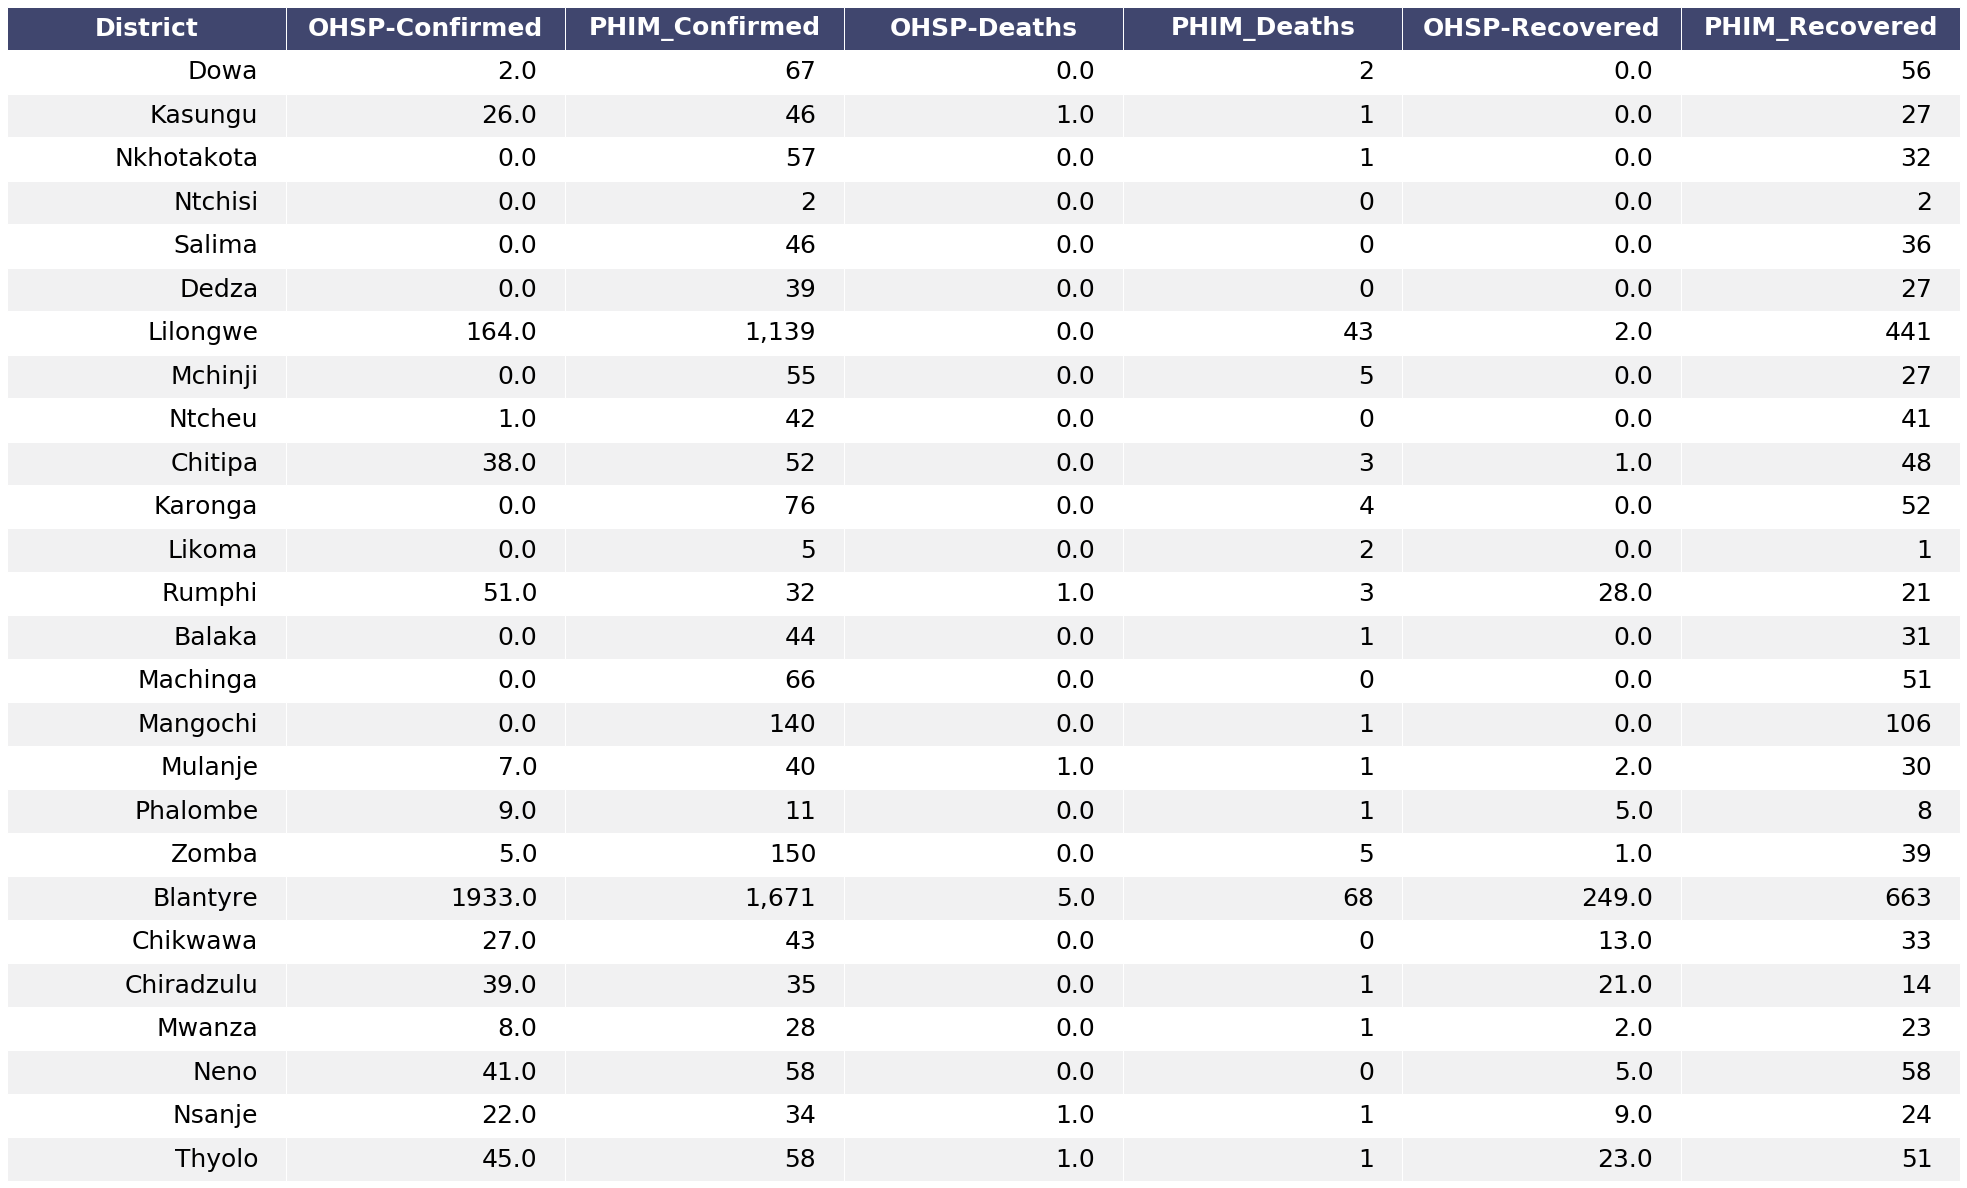

In [170]:
def render_mpl_table(data, col_width=3.0, row_height=0.8, font_size=25,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w', title= 'Innocent',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(district_comparison, header_columns=0, col_width=5.0)

<function __main__.render_mpl_table>